# Pandas and Matplotlib

## 1 Pandas 

## A Python data analysis library and data manipulation tool
- essential Python library for data analysis

- a "wrapper" around numpy
    - basic knowledge of numpy is required for this course
    - numpy provides efficiency "under the hood"
    - pandas provides lots of ready-made functions for analyzing and plotting data

- "Excel inside of Python"

- provides its own data structures
    - `Series` and `DataFrame`s have numerous methods to work on data
    - no need for imperative programming!

In [1]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# # from matplotlib import pyplot as plt # also possible

# only in jupyter notebooks: Embed plots inside Jupyter notebooks
%matplotlib inline

f'{pd.__version__=}, {np.__version__=}'

"pd.__version__='2.0.0', np.__version__='1.24.2'"

### 1.1 Pandas `Series` Objects

- essentially `np.ndarray`s with generalized indexing capabilities
- have an `index`, `values`, a `size`, and a `dtype`

- this notebook deals with the absolute basics
    - series construction
    - indexing series
    - setting values, setting the index
    - operations on series
    - boolean masks

In [14]:
pd.Series

pandas.core.series.Series

#### 1.1.1 Constructing `Series` from Python objects
- may use `list`s, `tuple`s, or `dicts`
- can contain different datatypes

In [15]:
integers = pd.Series([10, 30, 195, 2021])
type(integers)

pandas.core.series.Series

In [16]:
integers

0      10
1      30
2     195
3    2021
dtype: int64

In [17]:
integers.values, integers.index, integers.dtype, integers.size

(array([  10,   30,  195, 2021]),
 RangeIndex(start=0, stop=4, step=1),
 dtype('int64'),
 4)

In [18]:
floats = pd.Series((0.1, 0.2, 0.3))
floats

0    0.1
1    0.2
2    0.3
dtype: float64

In [19]:
ordinal_values = pd.Series({'a': 97, 'b': 98, 'c': 99})
ordinal_values

a    97
b    98
c    99
dtype: int64

In [20]:
ordinal_values.values, ordinal_values.index

(array([97, 98, 99]), Index(['a', 'b', 'c'], dtype='object'))

`set` don't work:

In [21]:
unordered_series = pd.Series({1, 2, 3})

TypeError: 'set' type is unordered

In [ ]:
objects = pd.Series([[1, 2, 3], (1, 'tuple'), {'a', 'set'}, "a string"])
objects

0     [1, 2, 3]
1    (1, tuple)
2      {set, a}
3      a string
dtype: object

#### 1.1.2 Generating `Series` from numpy arrays
- fastest to "stay in the numpy world"
- Series neatly wrap themselves around numpy arrays

In [ ]:
array = np.arange(10, 14)
integers = pd.Series(data=array)
integers

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
random_floats_array = np.random.rand(3) * 10
random_floats = pd.Series(random_floats_array)
random_floats

0    4.320849
1    0.031916
2    9.446108
dtype: float64

In [ ]:
random_bell = pd.Series(np.random.randn(4))
random_bell

0    0.386429
1   -0.605366
2   -0.063404
3    0.355684
dtype: float64

### 1.2 Indexing Series
- not recommended: Python indices
    - unintuitive behavior
    - slicing refers to *numeric* indices
- use Series methods `.loc`, `.iloc` instead

In [ ]:
integers

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
integers[0]

10

In [ ]:
11 in integers, 2 in integers

(False, True)

In [ ]:
integers[-1]

KeyError: -1

In [ ]:
ordinal_values

a    97
b    98
c    99
dtype: int64

In [ ]:
ordinal_values['a'], ordinal_values[1]

(97, 98)

In [ ]:
ordinal_values[0:2]

a    97
b    98
dtype: int64

#### 1.2.1 Indexing with `.loc`, `.iloc` methods
- [`loc[<index value>]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.loc.html)
    - access by (index) label
    - slices include both end points

- [`iloc[<index value>]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
    - numeric indexing with integers, from 0
    - slices exclude the end point (as with e.g. ranges)
- can be used with boolean arrays

In [ ]:
ordinal_values

a    97
b    98
c    99
dtype: int64

In [ ]:
ordinal_values.loc['a'], ordinal_values.iloc[1]

(97, 98)

In [ ]:
ordinal_values.loc['a':'c']

a    97
b    98
c    99
dtype: int64

In [ ]:
yearly_numbers = pd.Series(data=[137, 214, 195, 271], index=[2014, 2016, 2018, 2020])
yearly_numbers

2014    137
2016    214
2018    195
2020    271
dtype: int64

In [ ]:
yearly_numbers.loc[2020], yearly_numbers.iloc[-1]

(271, 271)

In [ ]:
yearly_numbers.iloc[0:2]

2014    137
2016    214
dtype: int64

In [ ]:
yearly_numbers.loc[2014:2018]

2014    137
2016    214
2018    195
dtype: int64

#### 1.2.2 Setting values
- values of a `Series` can be modified
- use `.loc`, `.iloc` for indexing!
    - unintuitive results with "standard Python" indices

In [ ]:
yearly_numbers

2014    137
2016    214
2018    195
2020    271
dtype: int64

In [ ]:
yearly_numbers[2014] = 138
yearly_numbers

2014    138
2016    214
2018    195
2020    271
dtype: int64

In [ ]:
yearly_numbers[2016] = 300.78  # Warning: This is typecast to `int` (old version) or change *Series* to 'float' (newer version)
yearly_numbers

2014    138.00
2016    300.78
2018    195.00
2020    271.00
dtype: float64

In [ ]:
yearly_numbers[2018] = "300"  # Warning: This is typecast to `int` (old version) or change *Series* to 'object' (newer version)
yearly_numbers

2014     138.0
2016    300.78
2018       300
2020     271.0
dtype: object

In [ ]:
yearly_numbers[2020] = "300.7889"  # Warning: Now the *Series* changes!
yearly_numbers[0:2] = [1.5, 2.2]  # This also changes the series!
yearly_numbers

2014         1.5
2016         2.2
2018         300
2020    300.7889
dtype: object

In [ ]:
# Do it this way instead
yearly_numbers = pd.Series(data=[137, 214, 195, 271], index=[2014, 2016, 2018, 2020])
yearly_numbers

2014    137
2016    214
2018    195
2020    271
dtype: int64

In [ ]:
yearly_numbers.loc[2014] = 300.78
yearly_numbers  # Setting with `.loc` *always* changes the Series datatype

2014    300.78
2016    214.00
2018    195.00
2020    271.00
dtype: float64

In [ ]:
yearly_numbers.iloc[2] = "Can also set to a string"
yearly_numbers

2014                      300.78
2016                       214.0
2018    Can also set to a string
2020                       271.0
dtype: object

In [ ]:
yearly_numbers.loc[2014:2018] = ['this', 'also', 'works']
yearly_numbers

2014     this
2016     also
2018    works
2020    271.0
dtype: object

#### 1.2.3 Setting the Index
- `Series` have an `index` as a separate attribute
    - index itself is a numpy array
- can be inspected and set
    - various data types possible
   

In [ ]:
yearly_numbers.index

Index([2014, 2016, 2018, 2020], dtype='int64')

In [ ]:
yearly_numbers.index = [0, 2, 4, 6]
yearly_numbers

0     this
2     also
4    works
6    271.0
dtype: object

In [ ]:
floats.values, floats.index

(array([0.1, 0.2, 0.3]), RangeIndex(start=0, stop=3, step=1))

In [ ]:
floats.index = ['c', 'b', 'd']
floats

c    0.1
b    0.2
d    0.3
dtype: float64

In [ ]:
floats.loc['b']

0.2

In [ ]:
floats.loc['c':'d']

c    0.1
b    0.2
d    0.3
dtype: float64

In [ ]:
monthly_numbers = pd.Series([5, 2, 3, 91], index='Jan Feb Mar Apr'.split())
monthly_numbers

Jan     5
Feb     2
Mar     3
Apr    91
dtype: int64

#### 1.2.4 Non-unique indices
- indices of a series do not have to be distinct
- non-unique indices let us extract more than one data point

In [ ]:
logon_times = pd.Series([10, 23, 51, 2], index=['root', 'giar', 'czerner', 'root'])
logon_times

root       10
giar       23
czerner    51
root        2
dtype: int64

In [ ]:
logon_times.loc['root']

root    10
root     2
dtype: int64

In [ ]:
logon_times.loc['root':'czerner']  # Slices don't work anymore

KeyError: "Cannot get left slice bound for non-unique label: 'root'"

#### 1.2.5 Fancy indexing
- we can address series by more than one index at once
    - give a sequence of indices we want to pull out for `.loc`, `.iloc`
    - values may repeat

In [ ]:
monthly_numbers

Jan     5
Feb     2
Mar     3
Apr    91
dtype: int64

In [ ]:
monthly_numbers.loc[['Jan', 'Mar']]

Jan    5
Mar    3
dtype: int64

In [ ]:
monthly_numbers.iloc[[1, 2, 3, 2, 3, 2, 1]]

Feb     2
Mar     3
Apr    91
Mar     3
Apr    91
Mar     3
Feb     2
dtype: int64

In [ ]:
integers

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
integers.loc[[True, False, True, True]]

0    10
2    12
3    13
dtype: int64

### 1.3 Operations on Series
- Series can be added, multiplied, divided, ...
    - operations are performed element-wise
    - with other series: performed by index
    - with scalar values: broadcast to all values

In [ ]:
yearly_revenue = pd.Series([4, 20, 69, 420])
yearly_expenses = pd.Series([1, 33, 7, 57])

yearly_revenue - yearly_expenses

0      3
1    -13
2     62
3    363
dtype: int64

In [ ]:
yearly_revenue + yearly_expenses

0      5
1     53
2     76
3    477
dtype: int64

In [ ]:
yearly_revenue % yearly_expenses

0     0
1    20
2     6
3    21
dtype: int64

In [ ]:
yearly_revenue > yearly_expenses

0     True
1    False
2     True
3     True
dtype: bool

In [ ]:
yearly_revenue = pd.Series([4, 20, 69, 420], index=[2017, 2018, 2019, 2020])
yearly_expenses = pd.Series([1, 33, 7, 57], index=[2020, 2018, 2017, 2019])

yearly_revenue - yearly_expenses

2017     -3
2018    -13
2019     12
2020    419
dtype: int64

In [ ]:
yearly_expenses = pd.Series(
    [1, 33, 7, 57, 120000], index=[2020, 2018, 2017, 2019, 2020]
)
yearly_revenue - yearly_expenses

2017        -3
2018       -13
2019        12
2020       419
2020   -119580
dtype: int64

In [ ]:
integers

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
integers + 2

0    12
1    13
2    14
3    15
dtype: int64

In [ ]:
integers**2

0    100
1    121
2    144
3    169
dtype: int64

In [ ]:
integers + 0.2

0    10.2
1    11.2
2    12.2
3    13.2
dtype: float64

In [ ]:
integers < 12

0     True
1     True
2    False
3    False
dtype: bool

### 1.4 Boolean Masks
- an easy way to extract data by condition
    1. create a boolean mask (same length, entries `True` / `False`)
    2. use with `.loc`
- careful: Cannot use "Truthiness" in place of booleans
    - may need to explicitly compare

In [ ]:
integers

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
integers < 12

0     True
1     True
2    False
3    False
dtype: bool

In [ ]:
integers.loc[integers < 12]

0    10
1    11
dtype: int64

In [ ]:
integers % 2

0    0
1    1
2    0
3    1
dtype: int64

In [ ]:
integers[integers % 2]

0    10
1    11
0    10
1    11
dtype: int64

In [ ]:
integers[integers % 2 == 1]

1    11
3    13
dtype: int64

In [ ]:
integers[(integers < 11) | (integers > 12)]

0    10
3    13
dtype: int64

### 1.5 Tasks

##### 1. Erstellen Sie eine `Series` mit 8 zufälligen Integern zwischen einschließlich 0 und 7. Nutzen Sie als Indizes die Buchstaben "a" bis "h". (Note: Benutzen Sie np.random.randint() )

In [ ]:
random = pd.Series(np.random.randint(0, 8, 8), index=list('abcdefgh'))
random

a    1
b    4
c    7
d    2
e    7
f    4
g    7
h    5
dtype: int64

##### 2. Welchen Eintrag finden Sie unter dem Index "d"? Geben Sie ihn aus.

In [ ]:
random.loc['d']

2

##### 3. Geben Sie den ersten, den fünften, und den letzten Eintrag der Series aus.

In [ ]:
random.iloc[[4, -1]]

e    7
h    5
dtype: int64

##### 4. Geben Sie alle Einträge aus, die einen ungeraden Wert haben.

In [ ]:
random.loc[random % 2 == 1]


a    1
c    7
e    7
g    7
h    5
dtype: int64

##### 5. Ist die Summe dieser Einträge gerade oder ungerade?

In [ ]:
random.loc[random % 2 == 1].sum()



27

##### 6. Kopieren Sie die Werte in eine neue Series. Nutzen Sie dabei die Indizes 'fegdachb' in dieser Reihenfolge.

In [ ]:
#Kopieren Sie die Werte in eine neue Series. Nutzen Sie dabei die Indizes 'fegdachb' in dieser Reihenfolge.
random_2 = random.loc[list('fegdachb')].copy()
random_2


f    4
e    7
g    7
d    2
a    1
c    7
h    5
b    4
dtype: int64

##### 7. Was erhalten Sie, wenn Sie die beiden Series addieren?

In [ ]:
random + random_2

a     2
b     8
c    14
d     4
e    14
f     8
g    14
h    10
dtype: int64

## 2 Matplotlib

Matplotlib is a plotting library for Python. It is the main plotting module for the scientific Python stack. The library provides an object-oriented API to plotting toolkits like Tkinter, Qt and other.

### 2.1 [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)

- [`pyplot` module](https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/pyplot.py) offers a set of functions to create and work with figures
- `pyplot` is *stateful*, i.e. state (e.g. certain settings) is preserved across function calls
- first thing to do when intending to work with `matplotlib`:
```python
import matplotlib.pyplot as plt # commonly accepted alias for `pyplot`
```

### 2.1.1 `Figure`s

- Contains the full 'canvas' for graphics output and is connected to a drawing backend (e.g. inline display, PyQT5, ...)
- [`matplotlib.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) class is the top-level container for everything related to the figure.
```python
# factory function from `pyplot` module that returns an empty instance
fig = plt.figure()
```
We can also use the `Figure` methods to manage the figure.
- Can contain one or more `Axes` objects.

#### 2.1.2 `Axes`
- Region of the figure containing drawn data. A `Figure` can contain one or more `Axes` instances.
- [`Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) contain *two* [`Axis`](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) ("$x$-axis" and "$y$-axis") objects that are used to manage the range of shown values (like a number-line).
- Obtaining a `Axes` instance:
```python
# Get instance of `Figure` and `Axes` class from `subplots()` factory function.
fig, ax = plt.subplots() # `Figure` instance with single `Axes`
```
- `matplotlib.axis.Axes` class implements methods to manage drawings. These member functions are the most common way of using the object-oriented API. For example:
    - `ax.set_title()`: The title of current `Axes`.
    - `ax.set_xlim()`, `ax.set_ylim()`: Set limits for value ranges along $x$- and $y$-axis.

The "anatomy of a Matplotlib figure" is detailed [here](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png).

In [22]:
# Global setting for better readabiliy of text
font = {"size": 15}
mpl.rc('font', **font)

### 2.2 `pyplot` functional API

#### 2.2.1 The [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function
```python
plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
```

Typical call signatures:

```python
plot([x], y, [fmt], **kwargs) # [<param>]: optional parameters
plot([x0], y0, [fmt0], [x1], y1, [fmt1], **kwargs)
```

- `x`: *ordinate* values ($x$ values)
- `y`: *abscissa* values ($y$ values)
- `**kwargs`: Can be used for further customisation of the plots.

Plotting a parabola: $y = f(x) = x^2$

In [23]:
# Instanciate a figure object with `figure()` factory function. Here we only need it to set the size of the figure.
fig = plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

In [24]:
x_min, x_max, num_points = -1, 1, 101
x_values = pd.Series(np.linspace(x_min, x_max, num=num_points))
x_values

0     -1.00
1     -0.98
2     -0.96
3     -0.94
4     -0.92
       ... 
96     0.92
97     0.94
98     0.96
99     0.98
100    1.00
Length: 101, dtype: float64

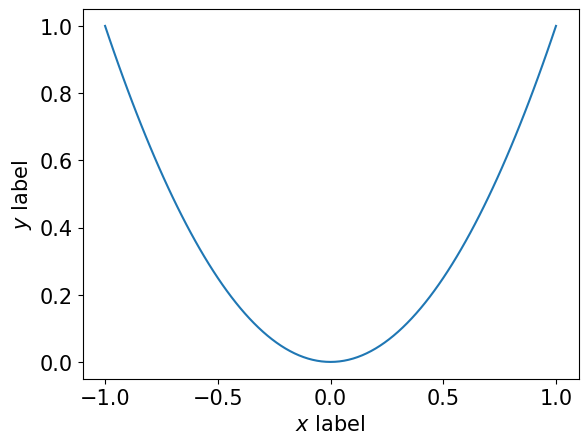

In [25]:
# Axis labels are paricularily important when dealing data with units (e.g. cm or kg).?
plt.xlabel("$x$ label")
plt.ylabel("$y$ label")
# In the most basic calls to `plot()` be only pass the x and the y values. `plt` "knows" about the global settings.
plt.plot(x_values, x_values**2)

We can also draw multiple graphs:

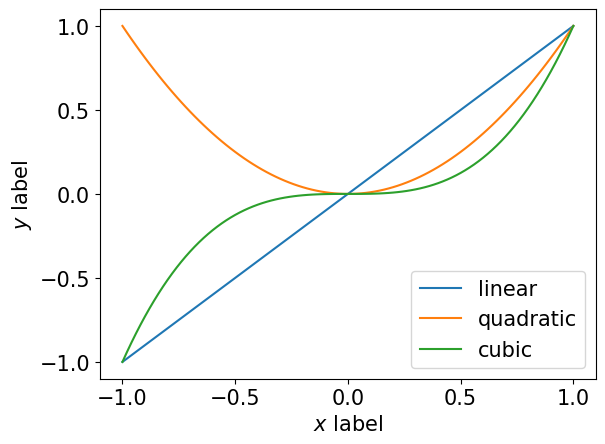

In [26]:
plt.xlabel("$x$ label")
plt.ylabel("$y$ label")

# We cann call `plot()` several times with x and y values. `plt` is *stateful* and hence memorises the result of
# previous calls to `plot()`.
plt.plot(x_values, x_values, label="linear")
plt.plot(x_values, x_values**2, label="quadratic")
plt.plot(x_values, x_values**3, label="cubic")

# Using a legend is advisable with multiple graphs in a single figure.
# Matplotlib will try to intelligently place the figure on the canvas.
plt.legend()

### 2.3 Object-oriented  API

The object-oriented (OO) API is generally more versatile.

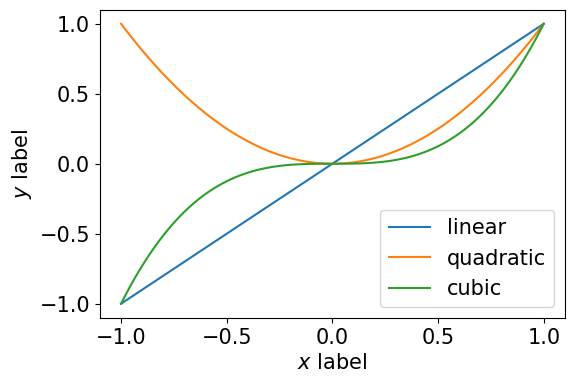

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

# We can make drawings by calling the suitable methods of the `Axes` instance.
ax.set_xlabel("$x$ label")  # Name of the method slightly different from functional API.
ax.set_ylabel("$y$ label")

# `Axes` object also have a `plot()` method. It can be called in in the same manner (same args etc)
# as when working with functional API. Linestyle and colours are selected from the available default values.
ax.plot(x_values, x_values, label="linear")
ax.plot(x_values, x_values**2, label="quadratic")
ax.plot(x_values, x_values**3, label="cubic")
ax.legend()

With the OO API we can easily create several `Axes` objects with the same `Figure`.

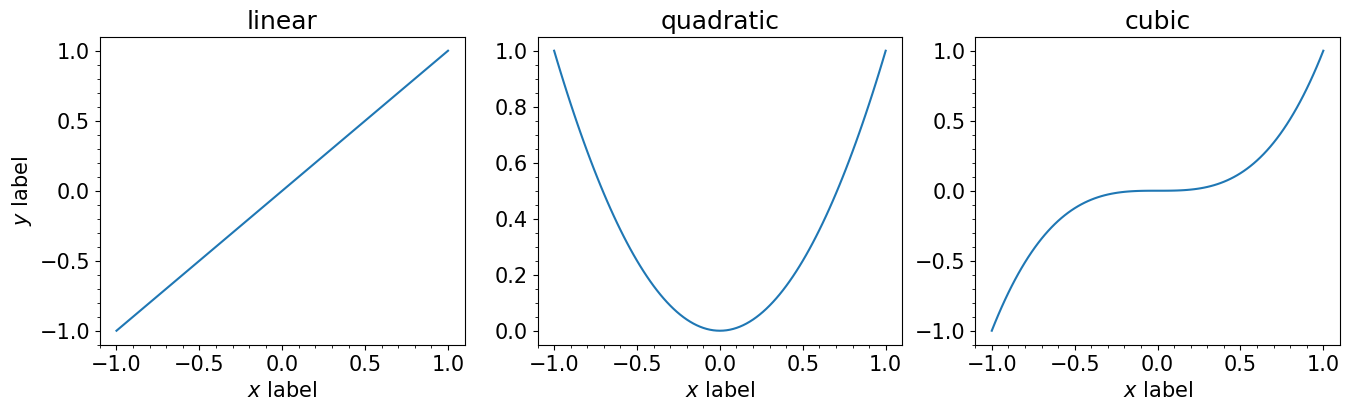

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

for title, ax in zip(("linear", "quadratic", "cubic"), (ax1, ax2, ax3)):
    ax.minorticks_on()  # Sometimes minorticks can be helpful in plots.
    ax.set_title(
        title
    )  # A title should be meaningful helping understand what is shown in the figure.
    ax.set_xlabel("$x$ label")
ax1.set_ylabel("$y$ label")

ax1.plot(x_values, x_values)
ax2.plot(x_values, x_values**2)
ax3.plot(x_values, x_values**3)

### 2.4 Customising plots

Visualising data is a key aspect of scientific work. While giving a condensed view on data (in the sense that raw numbers are not shown) plots can unravel important properties of data. We therefore must make sure to choose decent graphical representations.

#### 2.4.1 Lines and markers

During measurements samples usually cannot be continuously obtained. Data is obtained at a finite set of discrete values.

#### Example
Measuring a car's velocity at constant acceleration.

| time / s | velocity / m$\cdot$s$^{-1}$ |
|:----------:|:----------------:|
| 0.4     | 2.5            |
| 2.2      | 22.0           |
| 4.2      | 41.5           |
| 6.1      | 61.0           |

In [29]:
num_points = 11

time = np.linspace(0.25, 10, num=num_points)
velocity = 10 * time + np.random.normal(loc=0, scale=2, size=(num_points,))

data = pd.Series(index=time, data=velocity)
data

0.250      1.775720
1.225     15.292812
2.200     22.740519
3.175     30.246136
4.150     42.491816
5.125     50.354138
6.100     61.417953
7.075     71.865753
8.050     81.603341
9.025     92.157252
10.000    99.856596
dtype: float64

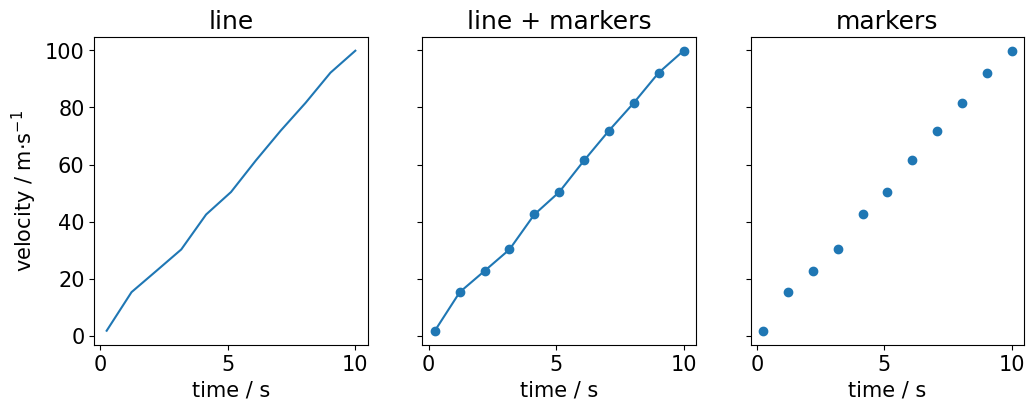

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

# axis labels with correct units are important
for title, ax in zip(("line", "line + markers", "markers"), (ax1, ax2, ax3)):
    ax.set_xlabel("time / s")
    ax.set_title(title)
ax1.set_ylabel("velocity / m$\cdot$s$^{-1}$")

ax1.plot(data.index, data.values)
ax2.plot(data.index, data.values, marker="o", linestyle="-")
ax3.plot(data.index, data.values, marker="o", linestyle="")

#### 2.4.2 Comments

- Line-only plot
    - Looks like we have more data points that actually measured (measured data cannot be easily identified)
    - Artificially connects data points 
    - $\Rightarrow$ Misleading representation of data

- Line + markers plot
    - Decently shows data obtained from measurement
    - Connection between data points still artificial but we may use it as "guide to the eye" (this should be clarified in e.g. in a figure caption)

- Marker-only plot
    - Decently shows data obtained from measurement
    - Often accompanied with fit

In [31]:
styles = {"marker": "o", "markersize": 8.5, "linestyle": "", "linewidth": 2.5}

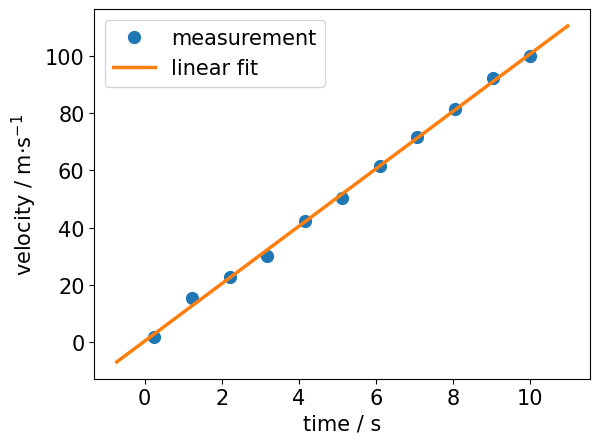

In [32]:
from scipy.stats import linregress


def fit_func_data(x, y, num_points=101):
    res = linregress(x, y)
    span = x.max() - x.min()
    x_values = np.linspace(x.min() - 0.1 * span, x.max() + 0.1 * span, num=num_points)
    y_values = np.vectorize(lambda x: res.intercept + res.slope * x)(x_values)
    return pd.Series(index=x_values, data=y_values)


fit_data = fit_func_data(data.index, data.values)

plt.xlabel("time / s")
plt.ylabel("velocity / m$\cdot$s$^{-1}$")
plt.plot(data.index, data.values, label="measurement", **styles)
plt.plot(
    fit_data.index, fit_data.values, label="linear fit", linewidth=styles["linewidth"]
)
plt.legend()

Different types (shapes) of [markers](https://matplotlib.org/stable/api/markers_api.html) are available from Matplotlib.

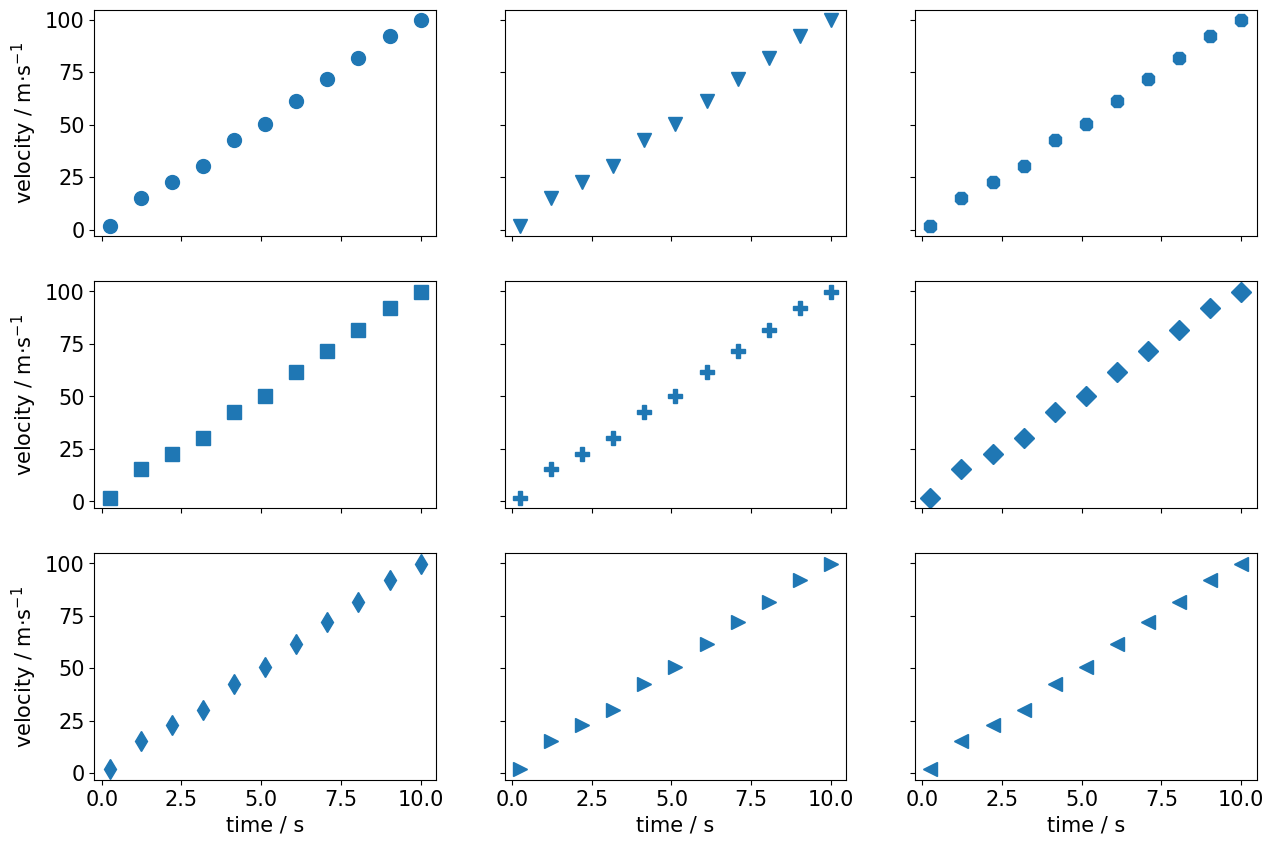

In [33]:
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15, 10))
for idx, (ax, marker) in enumerate(
    zip(axes.ravel(), ("o", "v", "8", "s", "P", "D", "d", ">", "<"))
):
    if (idx + 1) % 3 == 1:
        ax.set_ylabel("velocity / m$\cdot$s$^{-1}$")
    if idx > 5:
        ax.set_xlabel("time / s")
    ax.plot(data.index, data.values, marker=marker, markersize=10, linestyle="")

Different linestyles are also possible.

Allowed values for `linestyle` argument of the `plot()` function are:
```python
'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
```

In [34]:
x_values = np.linspace(-2 * np.pi, 2 * np.pi, num=1001)

plot_config = (
    dict(shift=-np.pi / 3, ls="-", lw=2.5, label=r"$\theta=\pi/3$"),
    dict(shift=0, ls="--", lw=2.5, label=r"$\theta=0$"),
    dict(shift=np.pi / 2, ls=":", lw=2.5, label=r"$\theta=\pi/2$"),
    dict(shift=np.pi, ls="-.", lw=2.5, label=r"$\theta=\pi$"),
)

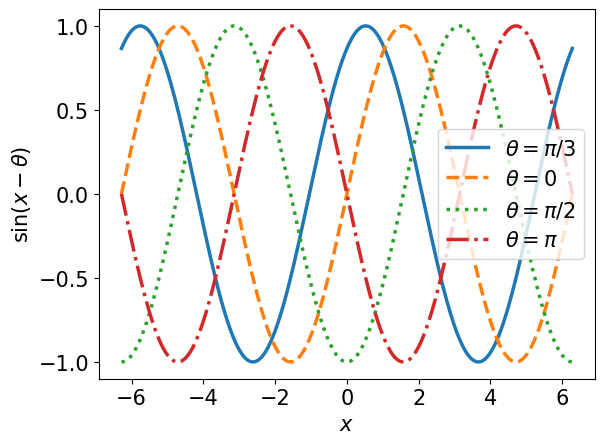

In [35]:
plt.xlabel(r"$x$")
plt.ylabel(r"$\sin(x-\theta)$")
for conf in plot_config:
    plt.plot(
        x_values,
        np.sin(x_values - conf["shift"]),
        linestyle=conf["ls"],
        linewidth=conf["lw"],
        label=conf["label"],
    )
plt.legend()

Colors for lines in plots can also be chosen manually.

For more information on how to use colors with Matplotlib refer to the followin links:

- https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors 
- https://matplotlib.org/stable/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py
- https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py

We can specify colors in multiple ways:
- RGB tuple: `(r_value, g_value, b_value)`, or RGBA tuple: `(r_value, g_value, b_value, alpha)`. The value inside  the tuple are float values from the closed interval `[0, 1]`.
- HEX strings
- Named colors from e.g. https://matplotlib.org/stable/gallery/color/named_colors.html or https://xkcd.com/color/rgb/

In [36]:
# Matplotlib can deal with named colors as well as HEX strings

named_colors = ("black", "red", "blue", "cyan")

hex_colors = (
    "#000000",  # "xkcd:blacks"
    "#e50000",  # "xkcd:red"
    "#0343df",  # "xkcd:blue"
    "#00ffff",
)  # "xkcd:cyan"

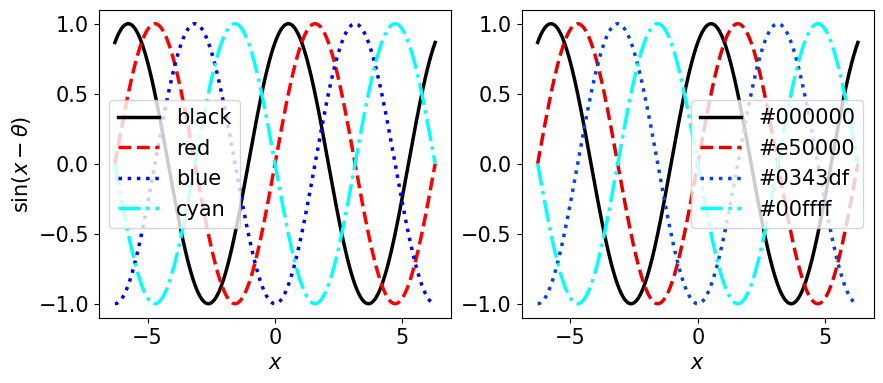

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for ax in (ax1, ax2):
    ax.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sin(x - \theta)$')

for color, conf in zip(named_colors, plot_config):
    ax1.plot(
        x_values,
        np.sin(x_values - conf["shift"]),
        color=color,
        linestyle=conf["ls"],
        linewidth=conf["lw"],
        label=color,
    )
ax1.legend()

for color, conf in zip(hex_colors, plot_config):
    ax2.plot(
        x_values,
        np.sin(x_values - conf["shift"]),
        color=color,
        linestyle=conf["ls"],
        linewidth=conf["lw"],
        label=color,
    )
ax2.legend()

It is often preferrable to separate data in multiple `Axes` objects. This will greatly enhance clarity.

Text(0.5, 0, '$x$')

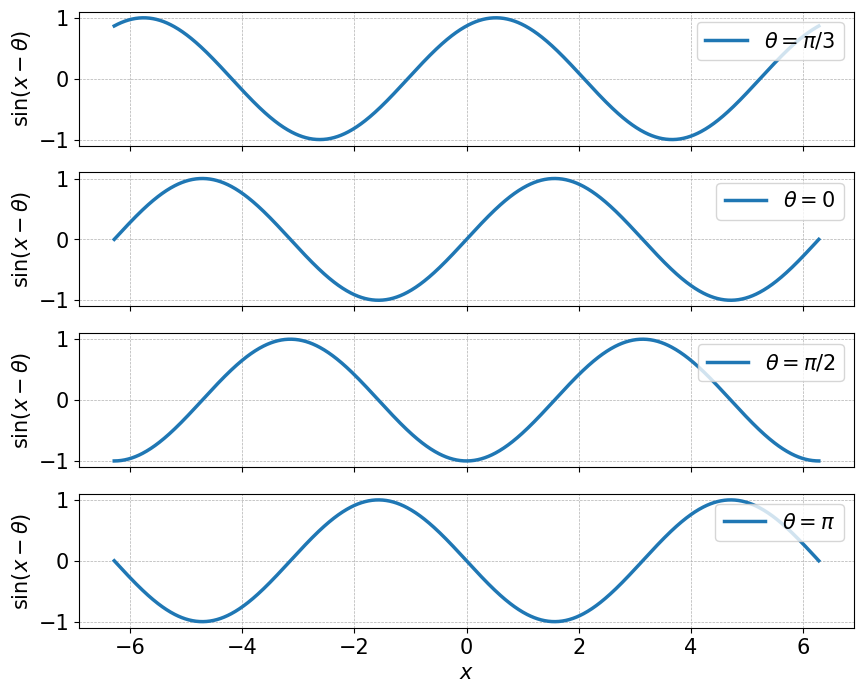

In [38]:
fig, axes = plt.subplots(
    nrows=len(plot_config), ncols=1, sharex="col", sharey=True, figsize=(10, 8)
)

for idx, (ax, conf) in enumerate(zip(axes, plot_config)):
    ax.set_ylabel(r"$\sin(x-\theta)$")
    ax.grid(linestyle="--", linewidth=0.5)
    ax.plot(
        x_values,
        np.sin(x_values - conf["shift"]),
        linewidth=conf["lw"],
        label=conf["label"],
    )
    ax.legend(loc="upper right")
axes[-1].set_xlabel("$x$")

A common use case of gathering multiple datasets in *one* `Axes` object is if we want to trace trends. 

In [39]:
def gaussians(x_values, sigma, offsets, weights):
    def gauss(x, sigma, offset):
        pre_factor = 1 / (sigma * np.sqrt(2 * np.pi))
        exp_factor = 1 / (2 * sigma**2)
        return pre_factor * np.exp(-((x - offset) ** 2) * exp_factor)

    return np.dot(
        weights,
        gauss(x_values, sigma, offsets[..., np.newaxis]),
    )


annealing_temperature = np.arange(100, 1001, 100)

#### Note

The data used for the following figure has *not* been obtained from real measurements.

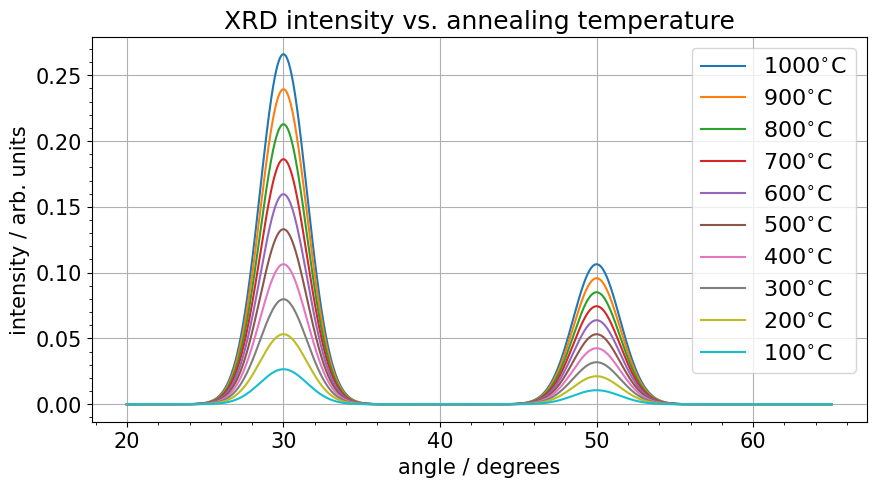

In [40]:
x_values = np.linspace(20, 65, num=10001)

_, ax = plt.subplots(figsize=(10, 5))
ax.set_title("XRD intensity vs. annealing temperature")
ax.set_xlabel(r"angle / degrees")
ax.set_ylabel(r"intensity / arb. units")
ax.grid()  # Grids can be helpful for orientation inside the figure.
ax.minorticks_on()  # Helpful for details.

for temp, damp in zip(annealing_temperature[::-1], np.arange(0.1, 1.1, 0.1)[::-1]):
    ax.plot(
        x_values,
        damp * gaussians(x_values, 1.5, np.array((30, 50)), (1, 0.4)),
        label=r"%d${}^{\circ}$C" % (temp,),
    )

ax.legend(loc="upper right", fontsize=16)

Another possible data encoding scheme is to use colors to encode additional degrees of freedom. 

Matplotlib offers many colormaps for different purposes. Colormaps must be chosen with care; for an in-depth discussion of things to consider (e.g. colorblind-friendly colormaps) please refer to [this website](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Refer to the [colormap reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html). 

In [41]:
import matplotlib.cm as cmap
import matplotlib.colors as colors

# We will encode the annealing temperature in colors. Lines representing data related to higher temperatures will be
# shown as lighter colors while lines related to data from lower-temperatures will be shown in darker colors.

color_map = plt.get_cmap("plasma")
# Normalise colormap to current range of values.
color_norm = colors.Normalize(
    vmin=-250 + np.min(annealing_temperature), vmax=+200 + np.max(annealing_temperature)
)
temp_to_color = cmap.ScalarMappable(norm=color_norm, cmap=color_map)

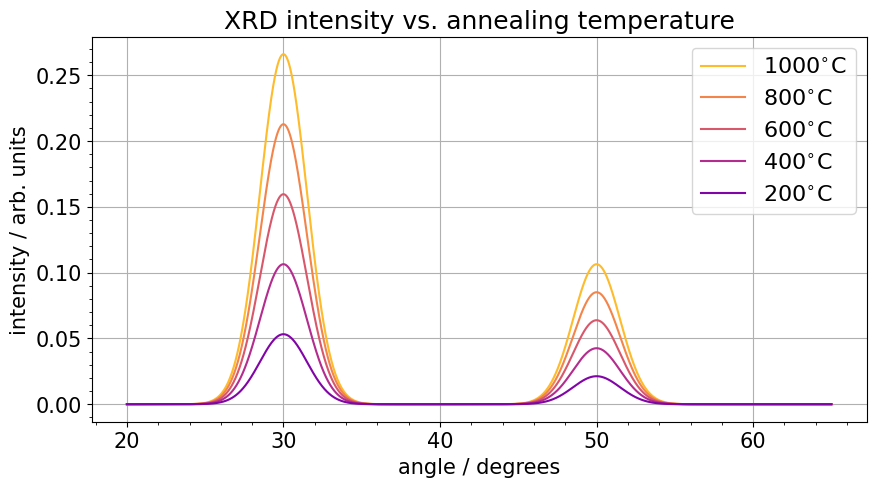

In [42]:
x_values = np.linspace(20, 65, num=10001)

_, ax = plt.subplots(figsize=(10, 5))
ax.set_title("XRD intensity vs. annealing temperature")
ax.set_xlabel(r"angle / degrees")
ax.set_ylabel(r"intensity / arb. units")
ax.grid()  # Grids can be helpful for orientation inside the figure.
ax.minorticks_on()  # Helpful for details.

for temp, damp in zip(annealing_temperature[::-2], np.arange(0.1, 1.1, 0.1)[::-2]):
    ax.plot(
        x_values,
        damp * gaussians(x_values, 1.5, np.array((30, 50)), (1, 0.4)),
        label=r"%d${}^{\circ}$C" % (temp,),
        color=temp_to_color.to_rgba(temp),
    )

ax.legend(loc="upper right", fontsize=16)

### 2.5 Axes styles

In case the units as well as the precise values at a particular axis are not important we leave them out.

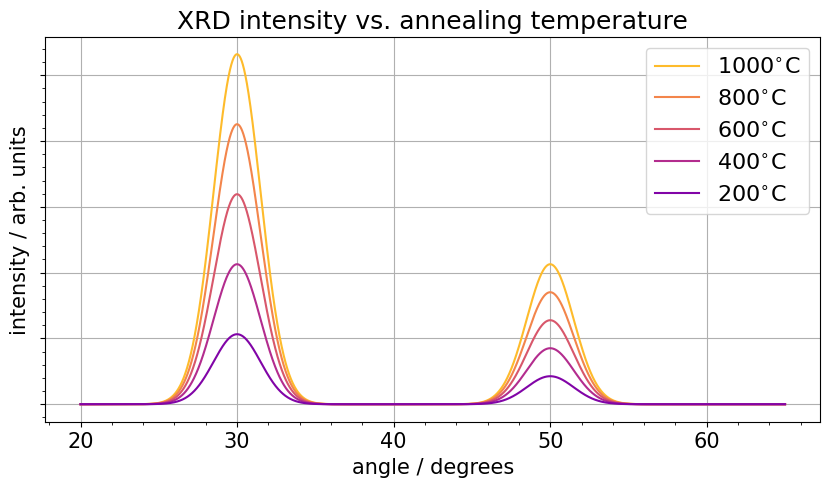

In [43]:
x_values = np.linspace(20, 65, num=10001)

_, ax = plt.subplots(figsize=(10, 5))
ax.set_title("XRD intensity vs. annealing temperature")
ax.set_xlabel(r"angle / degrees")
ax.set_ylabel(r"intensity / arb. units")
ax.set_yticklabels([])
ax.grid()  # Grids can be helpful for orientation inside the figure.
ax.minorticks_on()  # Helpful for details.

for temp, damp in zip(annealing_temperature[::-2], np.arange(0.1, 1.1, 0.1)[::-2]):
    ax.plot(
        x_values,
        damp * gaussians(x_values, 1.5, np.array((30, 50)), (1, 0.4)),
        label=r"%d${}^{\circ}$C" % (temp,),
        color=temp_to_color.to_rgba(temp),
    )

ax.legend(loc="upper right", fontsize=16)

We can set the ticks as well as the tick labels for the axes ourselves.

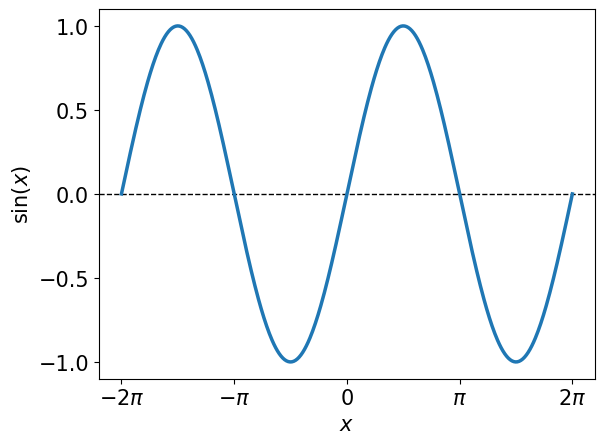

In [44]:
x_values = np.linspace(-2 * np.pi, 2 * np.pi, num=501)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xticks(np.linspace(-2 * np.pi, 2 * np.pi, 5))
ax.set_xticklabels((r"$-2\pi$", r"$-\pi$", "0", r"$\pi$", r"$2\pi$"))
# A zeroline can be a useful guide to the eye.
ax.axhline(y=0, color='black', linewidth=1.0, linestyle='--')
# ax.grid()

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sin(x)$")
ax.plot(x_values, np.sin(x_values), linewidth=2.5)

The range of values along an axis can be set manually.

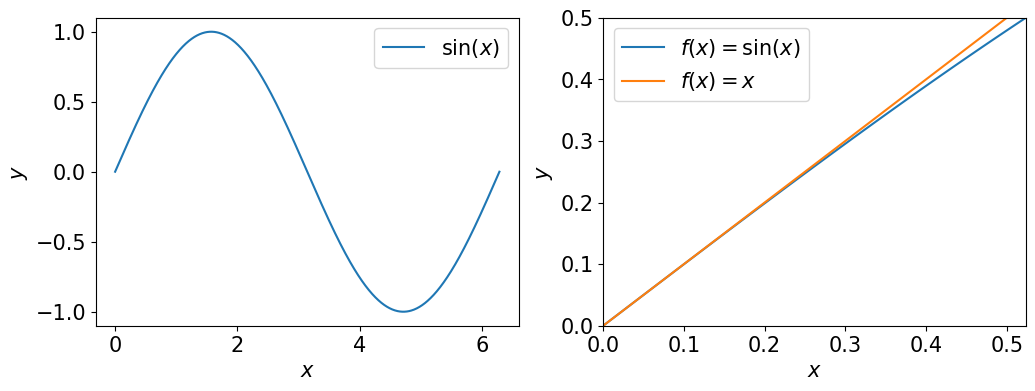

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False)
for ax in (ax1, ax2):
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")

x_values = np.linspace(0, 2 * np.pi, num=1001)
sine_values = np.sin(x_values)

# Plot showing the full data. Matplotlib chooses the value ranges automatically to make the figure look "good".
ax1.plot(x_values, sine_values, label=r"$\sin(x)$")
ax1.legend()
# Plot with truncated value ranges along x- and x-axis.
ax2.set_xlim((0, np.max(x_values) / 12))
ax2.set_ylim((0, 0.5))
ax2.plot(x_values, sine_values, label=r"$f(x) =\sin(x)$")
ax2.plot(x_values, x_values, label=r"$f(x) = x$")
ax2.legend()

#### log-linear and log-log plots

In [46]:
x_values = np.linspace(0.1, 10)


def fpower1(x, a, b):
    return a * x_values**b


def fpower2(x, a, l, g):
    return l * a ** (g * x_values)

#### log-log plot

If we have a functional relationship of the form $f(x) = y = a x^m$ we can take the logarithm to base $B$ (any base) on both sides to obtain:

$$
\log_B y = \log_B\left(a x^m\right) = \log_B a + \log_B \left(x^m\right) = \log_B a + m \log_B x 
$$

Setting $Y = \log_B y$, $X = \log_B x$ and $b = \log_B a$ we arrive at a linear equation 

$$
Y = m X + b
$$

with slope $m$ and (log $y$)-axis intercept $b$.

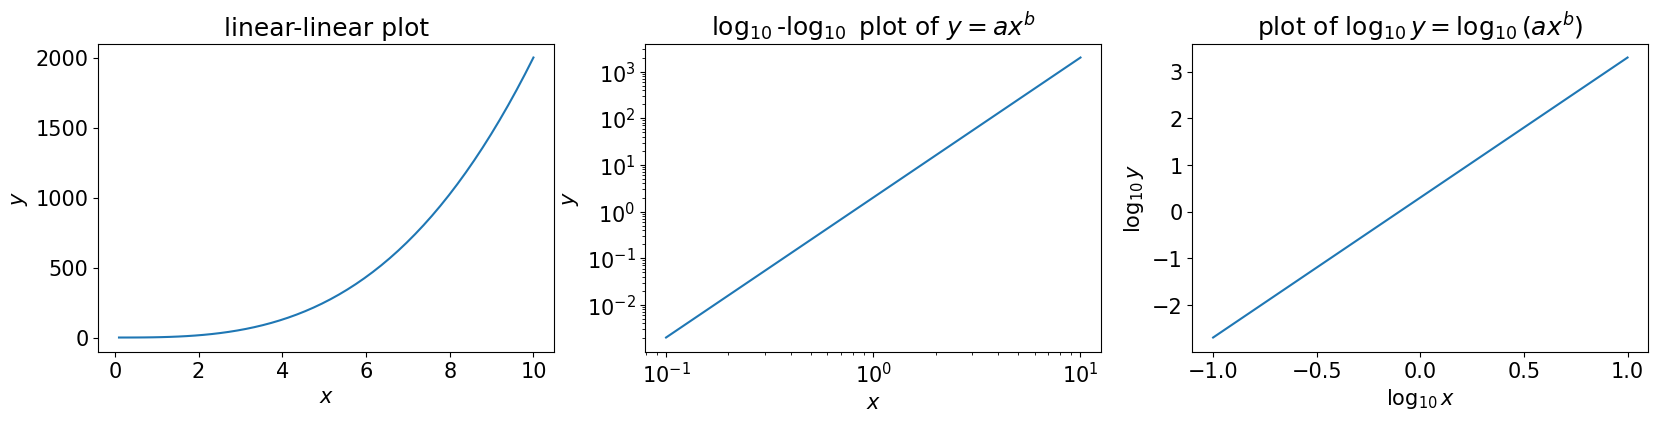

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

a, b = 2, 3

ax1.set_title(r"linear-linear plot")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.plot(x_values, fpower1(x_values, a, b))

ax2.set_title(r"$\log_{10}$-$\log_{10}$ plot of " + r"$y = a x^b$")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.plot(x_values, fpower1(x_values, a, b))

ax3.set_title(r"plot of " + r"$\log_{10}y = \log_{10}(a x^b)$")
ax3.set_xlabel(r"$\log_{10}x$")
ax3.set_ylabel(r"$\log_{10}y$")
ax3.set_xscale("linear")
ax3.set_yscale("linear")
ax3.plot(np.log10(x_values), np.log10(fpower1(x_values, a, b)))

#### log-linear plot

If we have a functional relationship of the form $f(x) = y = \lambda a^{\gamma x}$ we can take the logarithm to base $B$ (any base) on both sides to obtain:

$$
\log_B y = \log_B\left(\lambda a^{\gamma x}\right) = \log_B \lambda + x \gamma \log_B a
$$

Setting $Y = \log_B y$, $m = \gamma \log_Ba$ and $b = \log_B\lambda$ we obtain a linear equation 

$$
Y = m x + b
$$

with slope $m$ and (log $y$)-axis intercept $b$.

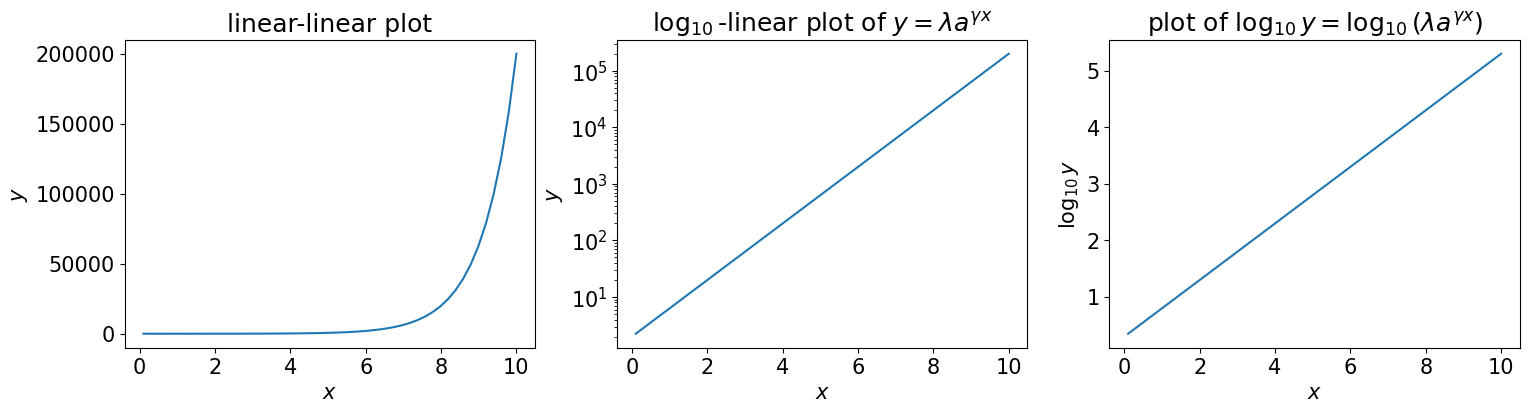

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

a, l, g = 10, 2, 0.5

ax1.set_title(r"linear-linear plot")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.plot(x_values, fpower2(x_values, a, l, g))

ax2.set_title(r"$\log_{10}$-linear plot of " + r"$y = \lambda a^{\gamma x}$")
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")
ax2.set_xscale("linear")
ax2.set_yscale("log")
ax2.plot(x_values, fpower2(x_values, a, l, g))

ax3.set_title(
    "plot of " + r"$\log_{10} y = \log_{10}\left(\lambda a^{\gamma x}\right)$"
)
ax3.set_xlabel(r"$x$")
ax3.set_ylabel(r"$\log_{10} y$")
ax3.set_xscale("linear")
ax3.set_yscale("linear")
ax3.plot(x_values, np.log10(fpower2(x_values, a, l, g)))

### 2.6 Tasks

##### 1. Dampened harmonic oscillator
Plot the dampened harmonic oscillation $f(t) = \mathrm{e}^{-t}\cdot\sin(2\pi\cdot 3 \cdot t)$ in the time interval $[0s, 5s]$, as well as the upper and lower exponential envelope. Add a legend and axis labels. Limit the x range to $[0, 5]$. How many points on the x-axis do you need to use in order for the graphs to appear smooth?

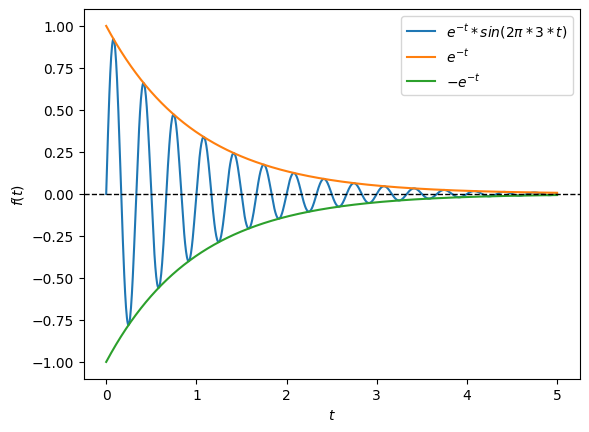

In [21]:
t_values = np.linspace(0, 5, num=1001)

def dampened_hamonic(t):
    return np.exp(-t) * np.sin(2 * np.pi * 3 * t)

plt.plot(t_values, dampened_hamonic(t_values), label=r"$e^{-t} * sin(2\pi * 3 *t)$")
plt.plot(t_values, np.exp(-t_values), label=r"$e^{-t}$")
plt.plot(t_values, -np.exp(-t_values), label=r"$-e^{-t}$")
plt.axhline(y=0, color='black', linewidth=1.0, linestyle='--')
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.show()



##### 2. Points in a circle

Gather a random array `P` of shape `(N, 2)` with `N=1000` uniformly from the range `[-1, 1]`. Interpret this as N 2D points and draw a scatterplot. Draw an unfilled circle on top, with radius 1 and origin (0, 0). Now, sort P into two arrays, `P_inside` and `P_outside`, depending on the points being inside or outside of the circle, using numpy. Plot the points inside in a different color. What is `P_inside.shape[0]/(P.shape[0]/4) ?`

In [1]:
#help(np.random)
N = 10_000_000
P = np.random.rand(N, 2) * 2 - 1

figure, axis = plt.subplots(1, 1, figsize=(6, 6))

#norm_mask = np.sqrt(np.sum(P ** 2, axis=1)) <= 1
norm_mask = np.linalg.norm(P, axis=1) <= 1

P_inside = P[norm_mask, :]
P_outside = P[~norm_mask, :]

axis.scatter(P_inside[:, 0], P_inside[:, 1],marker='x', color='blue', s=10000/N)
axis.scatter(P_outside[:, 0], P_outside[:, 1],marker='o', color='orange', s=10000/N)
circle = plt.Circle((0, 0), 1, color='black', fill=True, alpha=0.3)
axis.add_artist(circle)

ratio = P_inside.shape[0] / (P.shape[0]/4)
print(f'{ratio=}')


NameError: name 'np' is not defined

## 3 Plotting with Pandas `Series`

Pandas `Series` objects have an interface to Matplotlib that can be conventiently used to generate plots of datasets. The advantage of having a dedicated method for visualising (parts of) the data will become even more aparent when we deal with Pandas `DataFrame` objects.

`Series` instances have a [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) method that returns a Matplotlib `Axes` object.

The `kind` parameter of this method allows tho choose between different *types* of plots (default value is `'line'`). 

Possilbe value for `kind`:

- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh''` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as ‘kde’
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot.

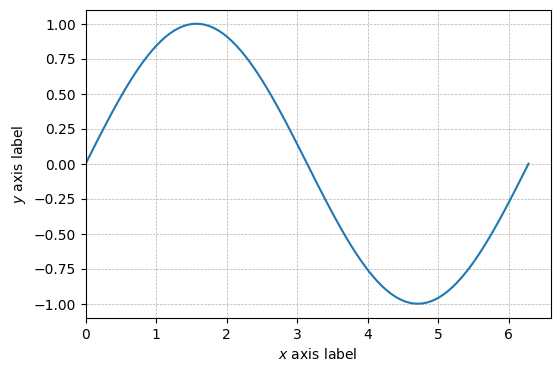

In [14]:
x_values = np.linspace(0, 2 * np.pi, num=101)
dataset = pd.Series(index=x_values, data=np.sin(x_values))

# The `plot()` method returns an `Axes` object. We save lots of boilerplate code since we do not have to pre-configure
# a `Figure` or `Axes` instances.
ax = dataset.plot(
    kind='line',
    figsize=(6, 4),
    xlim=(x_values.min() * 0.95, x_values.max() * 1.05),
    ylim=(-1.1, 1.1),
    xlabel=r"$x$ axis label",
    ylabel=r"$y$ axis label",
)
# After haveing added the data to the `Axes` object we can continue configuring the plot.
ax.grid(linestyle="--", linewidth=0.5)

We can also pass `Axes` object to the `plot()` method.

In [22]:
dataset_sine = pd.Series(index=x_values, data=np.sin(x_values))
dataset_cosine = pd.Series(index=x_values, data=np.cos(x_values))

# We prepare some general settings outside the `plot()` method. We can set up the layout of the plot according to our needs.
# In case we want to plot multiple datasets that are similar we can wrap this inside a function.
def setup(grid_shape, figsize=(4, 4)):
    fig, (ax1, ax2) = plt.subplots(
        nrows=grid_shape[0],
        ncols=grid_shape[1],
        figsize=figsize,
        sharex='row',
        sharey=False,
    )
    for ax in (ax1, ax2):
        # Depending on the dataset axis labels can either be set here ot passed to the `plot()` function.
        ax.set_xlabel(r"$x$ axis label")
    ax1.set_ylabel(r"$y$ axis label")
    return ax1, ax2

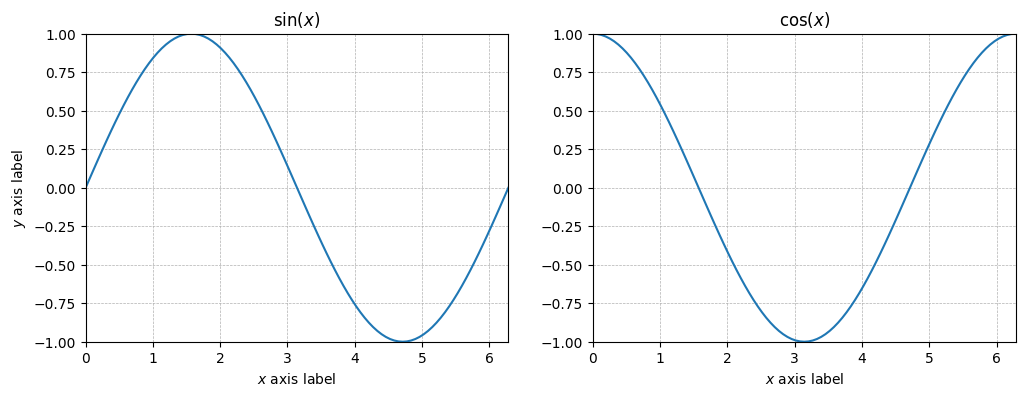

In [23]:
(ax1, ax2) = setup((1, 2), figsize=(12, 4))

dataset_sine.plot(
    kind='line', ax=ax1, title=r"$\sin(x)$", xlim=(0, 2 * np.pi), ylim=(-1, 1)
).grid(linestyle="--", linewidth=0.5)
dataset_cosine.plot(
    kind='line', ax=ax2, title=r"$\cos(x)$", xlim=(0, 2 * np.pi), ylim=(-1, 1)
).grid(linestyle="--", linewidth=0.5)

The various methods provided by `Series` object to operate on data can used in conjuction with the plotting functionality.

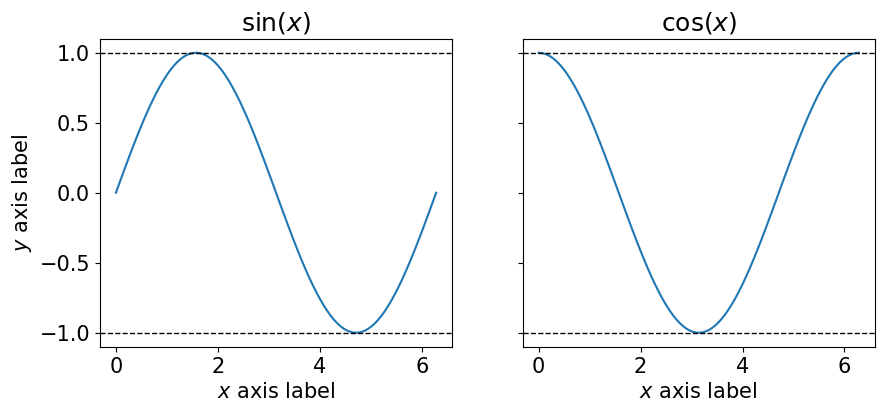

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex="all", sharey="all", figsize=(10, 4))
for ax in (ax1, ax2):
    ax.set_xlabel(r"$x$ axis label")
ax1.set_ylabel(r"$y$ axis label")


def plot(ax, data, title):
    data.plot(kind='line', ax=ax, title=title)
    ax.axhline(y=data.min(), color="black", linestyle="--", linewidth=1)
    ax.axhline(y=data.max(), color="black", linestyle="--", linewidth=1)


plot(ax1, dataset_sine, r"$\sin(x)$")
plot(ax2, dataset_cosine, r"$\cos(x)$")

The plotting capabilities of `Series` are particularly useful when dealing with categorical data.

As an example we will have at the look of at a comparision of run-times of several matrix-matrix implementations. These routines of usually carry the substring `*GEMM*` for *general matrix-matrix* multiplication. 

For the performance test we consider the following libraries:

- [Netlib BLAS](https://www.netlib.org/blas/)
- [BLIS](https://github.com/flame/blis)
- [OpenBLAS](https://www.openblas.net/)
- [Intel MKL](https://software.intel.com/content/www/us/en/develop/articles/intel-math-kernel-library-documentation.html)

In [24]:
import csv

In [27]:
# Sample dataset: DGEMM performance of various BLAS implementations. The run-times are measure for different matrix sizes.
def read_data(fp):
    with open(fp, newline='', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=";")
        column_names = next(reader)
        perftable = np.array([line for line in reader], dtype=float)
    return column_names[1:], perftable.T[0].astype(int), perftable.T[1:]


linalg_libs, matrix_sizes, dgemm_runtime = read_data(fp="dgemm_perfdata.csv")

dgemm_perf = {
    ms: pd.Series(index=linalg_libs, data=dgemm_runtime[:, idx])
    for idx, ms in enumerate(matrix_sizes)
}

In [28]:
# Inspect a sample dataset for matrix size 256
dgemm_perf[256]

netlib      4.56948
blis        1.37364
openblas    1.41928
mkl         1.29870
dtype: float64

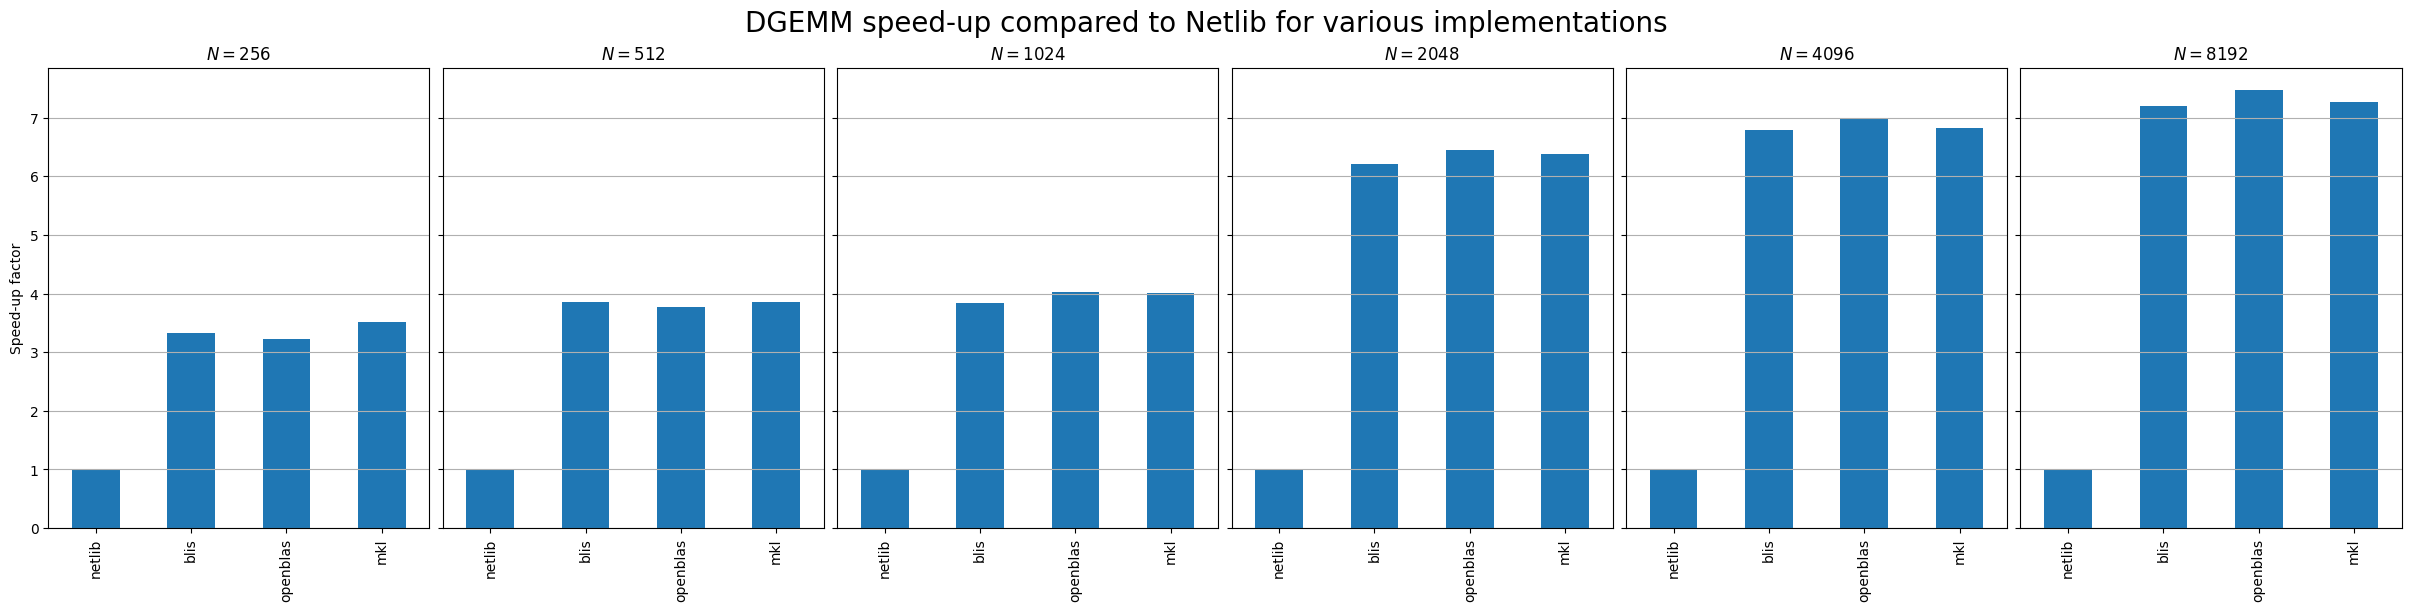

In [33]:
fig, axes = plt.subplots(
    1,
    len(dgemm_perf),
    sharex=True,
    sharey=True,
    constrained_layout=True,
    figsize=(24, 6),
)
fig.suptitle(
    "DGEMM speed-up compared to Netlib for various implementations", fontsize=20
)

# Note that Pandas adds the label for the x-axis automatically
axes[0].set_ylabel("Speed-up factor")
for ax, ms in zip(axes.flat, matrix_sizes):
    series = dgemm_perf.get(ms)
    series.transform(lambda x: series.loc["netlib"] / x).plot(
        kind="bar", ax=ax, title=r"$N=%d$" % (ms,)
    )
    # For this kind of plot it can be helpful to include a grid along one axis only.
    ax.grid(which="major", axis="y")

It is also possible to use the [`pd.Series.plot.[h]bar()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.bar.html) function. Several other functions (e.g. `line()`, `hist()`) are available from the `pd.Series.plot` module.

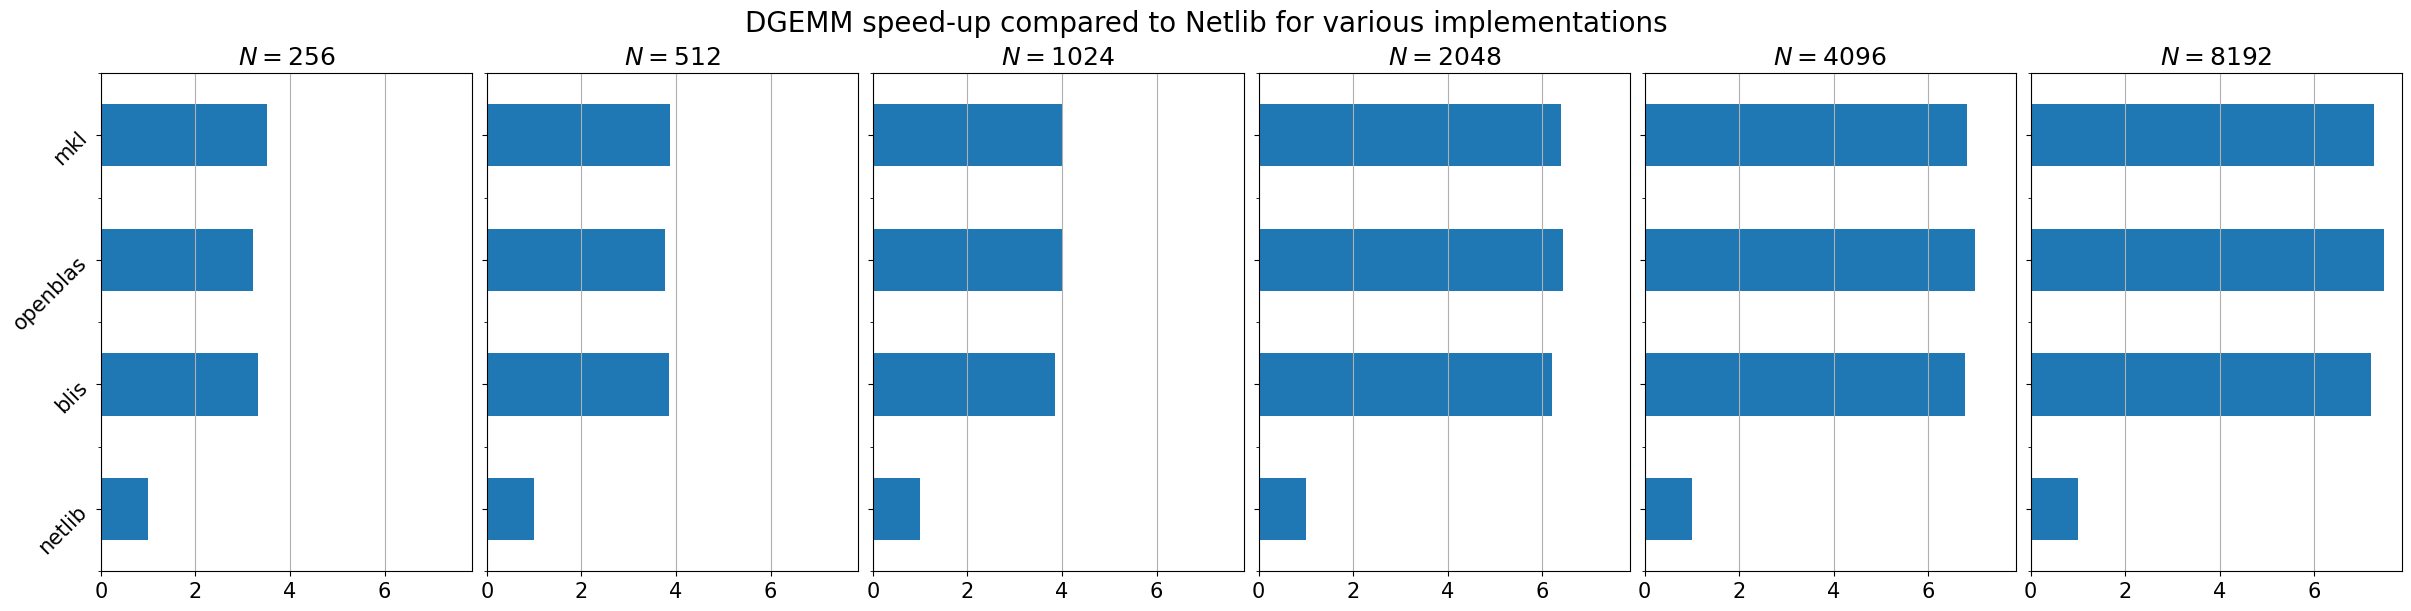

In [57]:
fig, axes = plt.subplots(
    1,
    len(dgemm_perf),
    sharex=True,
    sharey=True,
    constrained_layout=True,
    figsize=(24, 6),
)
fig.suptitle(
    "DGEMM speed-up compared to Netlib for various implementations", fontsize=20
)

for ax, ms in zip(axes.flat, matrix_sizes):
    ax.set_xlabel("Speed-up factor")
    series = dgemm_perf.get(ms)
    series.transform(lambda x: series.loc["netlib"] / x).plot.barh(
        ax=ax, title=r"$N=%d$" % (ms,), rot=45
    )
    # For this kind of plot it can be helpful to include a grid along one axis only.
    ax.grid(which="major", axis="x")

### 3.1 Tasks

#### 1. Konzentration von reaktiven Gasen
Sie erhalten Daten für die Konzentration zweier gasförmiger Chemikalien (Einheit: $\text{mol m}^{-3}$) in Abhängigkeit von der Zeit (Einheit: $\text{s}$). Es handelt sich um die Gase Ozon ($\text{O}_3$) und Stickstoffmonoxid ($\text{NO}$). Diese Gase werden in der Atmosphäre abgebaut. Stellen Sie die Zeitabhängigkeit der Konzentration sinnvoll dar, sodass der funktionale Zusammenhang sichtbar wird.

##### 1.1. Ozon

In [56]:
c_ozone = pd.Series(data=(1, 0.786, 0.649, 0.482, 0.381), index=(0, 50, 100, 200, 300))


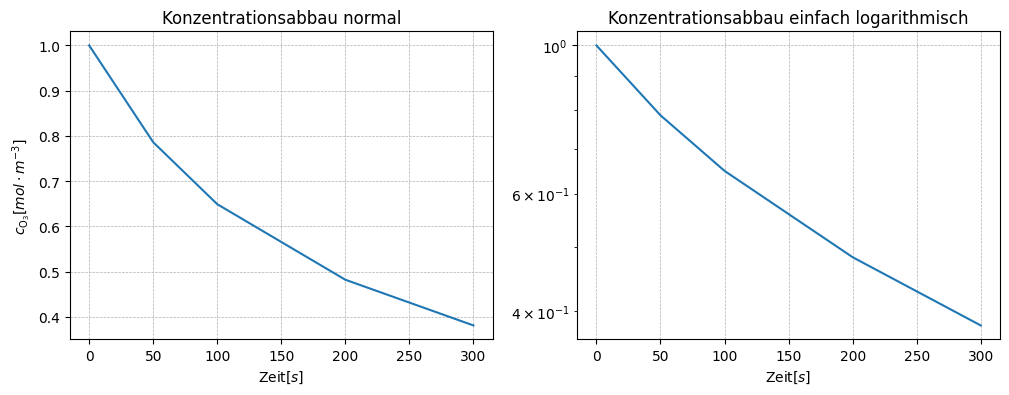

In [57]:
def setup(grid_shape, figsize=(4, 4)):
    fig, (ax1, ax2) = plt.subplots(
        nrows=grid_shape[0],
        ncols=grid_shape[1],
        figsize=figsize,
        sharex='row',
        sharey=False,
    )
    for ax in (ax1, ax2):
        # Depending on the dataset axis labels can either be set here ot passed to the `plot()` function.
        ax.set_xlabel(r"Zeit$[s]$")
    ax1.set_ylabel(r"$c_{\mathrm{O}_3}[mol\cdot m^{-3}]$")
    return ax1, ax2

(ax1, ax2) = setup((1, 2), figsize=(12, 4))
c_ozone.plot(title=r"Konzentrationsabbau normal", ax=ax1).grid(linestyle="--", linewidth=0.5)
c_ozone.plot(title=r"Konzentrationsabbau einfach logarithmisch", logy=True, ax=ax2).grid(linestyle="--", linewidth=0.5)

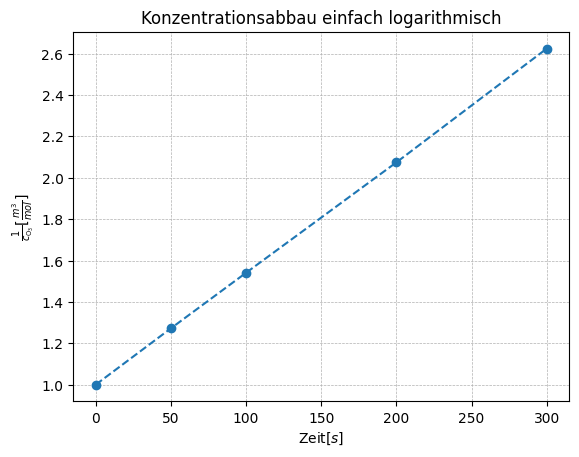

In [61]:
(1/c_ozone).plot(title=r"Konzentrationsabbau einfach logarithmisch", 
                 xlabel=r"Zeit$[s]$",
                 ylabel=r"$\frac{1}{c_{\mathrm{O}_3}}[\frac{m^3}{mol}]$",
                 marker = 'o',
                 linestyle = '--',
                ).grid(linestyle="--", linewidth=0.5)

##### 1.2. Stickstoffmonoxid

In [62]:
c_no = pd.Series(data=(8.13, 5.07, 2.41, 0.78, 0.36), index=(0, 50, 100, 200, 300))

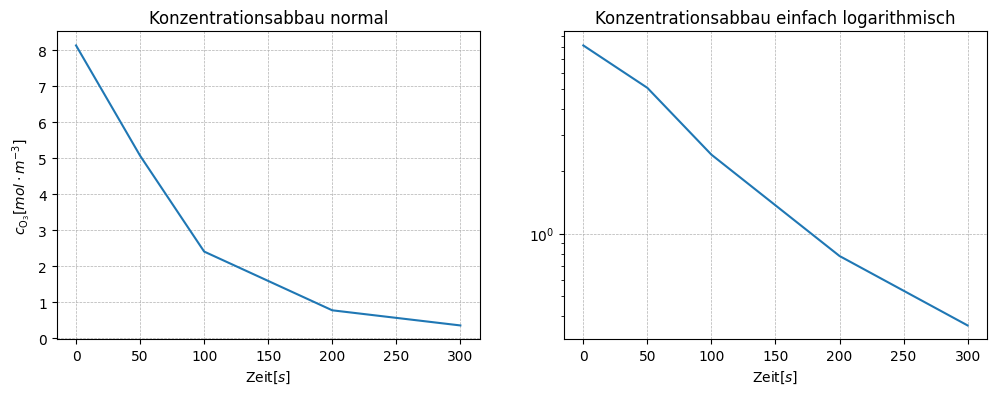

In [67]:
def setup(grid_shape, figsize=(4, 4)):
    fig, (ax1, ax2) = plt.subplots(
        nrows=grid_shape[0],
        ncols=grid_shape[1],
        figsize=figsize,
        sharex='row',
        sharey=False,
    )
    for ax in (ax1, ax2):
        # Depending on the dataset axis labels can either be set here ot passed to the `plot()` function.
        ax.set_xlabel(r"Zeit$[s]$")
    ax1.set_ylabel(r"$c_{\mathrm{O}_3}[mol\cdot m^{-3}]$")
    return ax1, ax2

(ax1, ax2) = setup((1, 2), figsize=(12, 4))
c_no.plot(title=r"Konzentrationsabbau normal", ax=ax1).grid(linestyle="--", linewidth=0.5)
c_no.plot(title=r"Konzentrationsabbau einfach logarithmisch", logy=True, ax=ax2).grid(linestyle="--", linewidth=0.5)

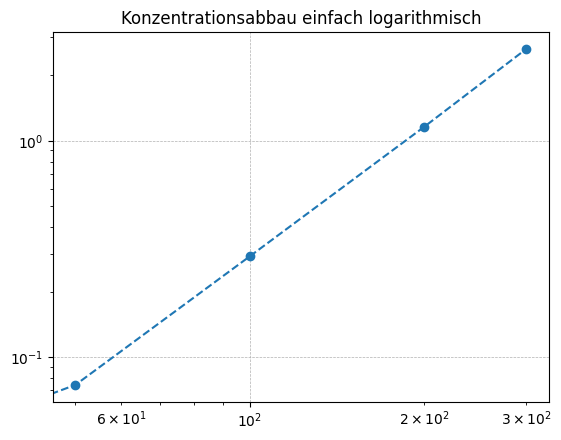

In [68]:
inverse_c_no = 1/c_no
inverse_c_no = inverse_c_no - inverse_c_no[0]
inverse_c_no.plot(title=r"Konzentrationsabbau einfach logarithmisch", 
                  loglog=True, 
                  marker = 'o', 
                  linestyle = '--',
                  ).grid(linestyle="--", linewidth=0.5)

#### 2. Reaktionskinetik
Reaktionsraten $k$ (Einheit: $\text{s}^{-1}$) bei verschiedenen Temperaturen $T$ (Einheit: $\color{red}{\text{K}}$) gehorchen erwartbar folgendem Gesetz (mit einer Naturkonstante $R$ und freien Parametern $k_0$, $E_A$):
$$k = k_0 \cdot \exp\left(\frac{-E_A}{R T}\right)$$

Sie erhalten Daten für $k$ (in $\text{s}^{-1}$) und $T$ (in $\color{red}{^\circ\text{C}}$).
Finden Sie eine geeignete Auftragung, die Ihnen die Bestimmung von $k_0$ und $E_A$ ermöglicht!

In [13]:
reaction_rates = pd.Series(data=(2.52, 5.25, 63, 316), index=(190, 199, 230, 251))

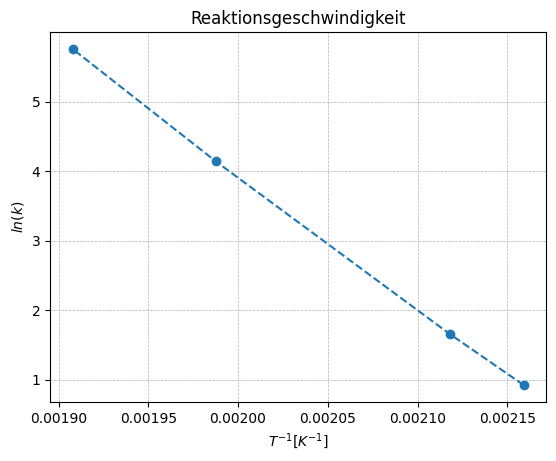

In [16]:
reaction_plot = pd.Series(index=(1/(273.15+reaction_rates.index)), data=np.log(reaction_rates.values))
reaction_plot.plot(title=r"Reaktionsgeschwindigkeit", 
                    xlabel=r"$T^{-1}[K^{-1}]$",
                    ylabel=r"$ln(k)$",
                    style='--o',
                    ).grid(linestyle="--", linewidth=0.5)